In [ ]:
#%%
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import io
import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pydotplus
import io
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("diabetes_data.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
print("Null values in dataset:", data.isnull().values.any())

Null values in dataset: False


In [ ]:
def convert_yes_no(txt):
    if 'Yes' in txt:
        return 1
    elif 'Positive' in txt:
        return 1
    elif 'Female' in txt:
        return 1
    else:
        return 0

In [ ]:
data['Gender'] = data['Gender'].apply(convert_yes_no)
data['Polyuria'] = data['Polyuria'].apply(convert_yes_no)
data['Polydipsia'] = data['Polydipsia'].apply(convert_yes_no)
data['sudden weight loss'] = data['sudden weight loss'].apply(convert_yes_no)
data['weakness'] = data['weakness'].apply(convert_yes_no)
data['Polyphagia'] = data['Polyphagia'].apply(convert_yes_no)
data['Genital thrush'] = data['Genital thrush'].apply(convert_yes_no)
data['visual blurring'] = data['visual blurring'].apply(convert_yes_no)
data['Itching'] = data['Itching'].apply(convert_yes_no)
data['Irritability'] = data['Irritability'].apply(convert_yes_no)
data['delayed healing'] = data['delayed healing'].apply(convert_yes_no)
data['partial paresis'] = data['partial paresis'].apply(convert_yes_no)
data['muscle stiffness'] = data['muscle stiffness'].apply(convert_yes_no)
data['Alopecia'] = data['Alopecia'].apply(convert_yes_no)
data['Obesity'] = data['Obesity'].apply(convert_yes_no)
data['class'] = data['class'].apply(convert_yes_no)


In [ ]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:

features = data.columns
features = [x for x in features if x != 'class']
features

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [ ]:

X = data[features]
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(len(X))
print(len(x_train))
print(len(x_test))

520
364
156


In [ ]:
# Random forest (default parameters)
RF = RandomForestClassifier()
RF = RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 2), "%" )

print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")

print("\nConfusion Matrix: ")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

Accuracy using Random Forest Classifier:  98.08 %
F1 Score:  98.4 %
Precision Score:  98.92 %
Recall Score:  97.87 %
AUC Score:  98.13 %

Confusion Matrix: 
[[61  1]
 [ 2 92]]


In [ ]:
# Random forest (tuned parameters)
RF = RandomForestClassifier(max_depth=9, n_estimators=5, random_state=0)
RF = RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier (Tuned): ", round(score, 2), "%" )
print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")

print("\nConfusion Matrix: ")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

Accuracy using Random Forest Classifier (Tuned):  99.36 %
F1 Score:  99.47 %
Precision Score:  98.95 %
Recall Score:  100.0 %
AUC Score:  99.19 %

Confusion Matrix: 
[[61  1]
 [ 0 94]]


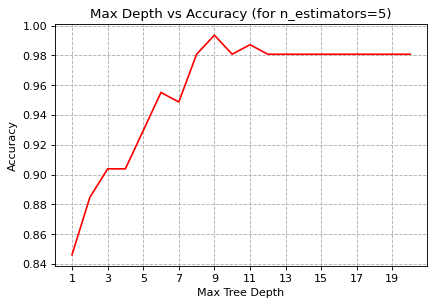

In [ ]:
x_point = []
y_point = []
for i in range (1, 21):
    RF = RandomForestClassifier(max_depth=i, n_estimators=5, random_state=0)
    RF = RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    x_point.append(i)
    y_point.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x_point, y_point, color = 'red')
plt.title('Max Depth vs Accuracy (for n_estimators=5)')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')
plt.xticks(range(1, 21, 2))
plt.show()

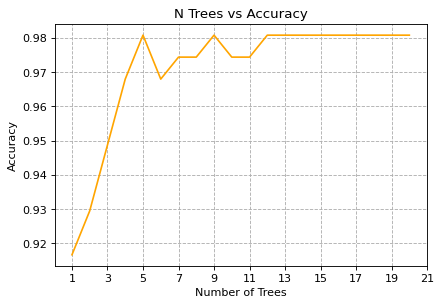

In [ ]:
x_point = []
y_point = []
for i in range (1, 21):
    RF = RandomForestClassifier(max_depth=8, n_estimators=i, random_state = 0)
    RF = RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    x_point.append(i)
    y_point.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x_point, y_point, color = 'orange')
plt.title('N Trees vs Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')
plt.xticks(range(1, 22, 2))
plt.show()

In [ ]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Logistic Regression: ", round(score, 2), "%" )

print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")


Accuracy using Logistic Regression:  93.59 %
F1 Score:  94.74 %
Precision Score:  93.75 %
Recall Score:  95.74 %
AUC Score:  93.03 %


In [ ]:
svmr = SVC(kernel='linear')
svmr.fit(x_train, y_train)
y_pred = svmr.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using SVM Classier (linear kernel): ", round(score, 2), "%" )

print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")


Accuracy using SVM Classier (linear kernel):  91.67 %
F1 Score:  93.05 %
Precision Score:  93.55 %
Recall Score:  92.55 %
AUC Score:  91.44 %


In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 2), "%" )

print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")


Accuracy using Decision Tree:  96.79 %
F1 Score:  97.33 %
Precision Score:  97.85 %
Recall Score:  96.81 %
AUC Score:  96.79 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Gaussian Naive Bayes: ", round(score, 2), "%" )

print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")


Accuracy using Gaussian Naive Bayes:  89.1 %
F1 Score:  91.28 %
Precision Score:  88.12 %
Recall Score:  94.68 %
AUC Score:  87.66 %


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 50, 25, 10), random_state=1, max_iter=1000)
mlpc = mlpc.fit(x_train, y_train)

y_pred = mlpc.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Multi Layer Perception Neural Network: ", round(score, 2), "%" )

print("F1 Score: ",round(f1_score(y_test, y_pred)*100,2),"%")
print("Precision Score: ",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall Score: ",round(recall_score(y_test, y_pred)*100,2),"%")
print("AUC Score: ",round(roc_auc_score(y_test, y_pred)*100,2),"%")

# cm = metrics.confusion_matrix(y_test, y_pred)
# print(cm)


Accuracy using Multi Layer Perception Neural Network:  98.08 %
F1 Score:  98.41 %
Precision Score:  97.89 %
Recall Score:  98.94 %
AUC Score:  97.86 %


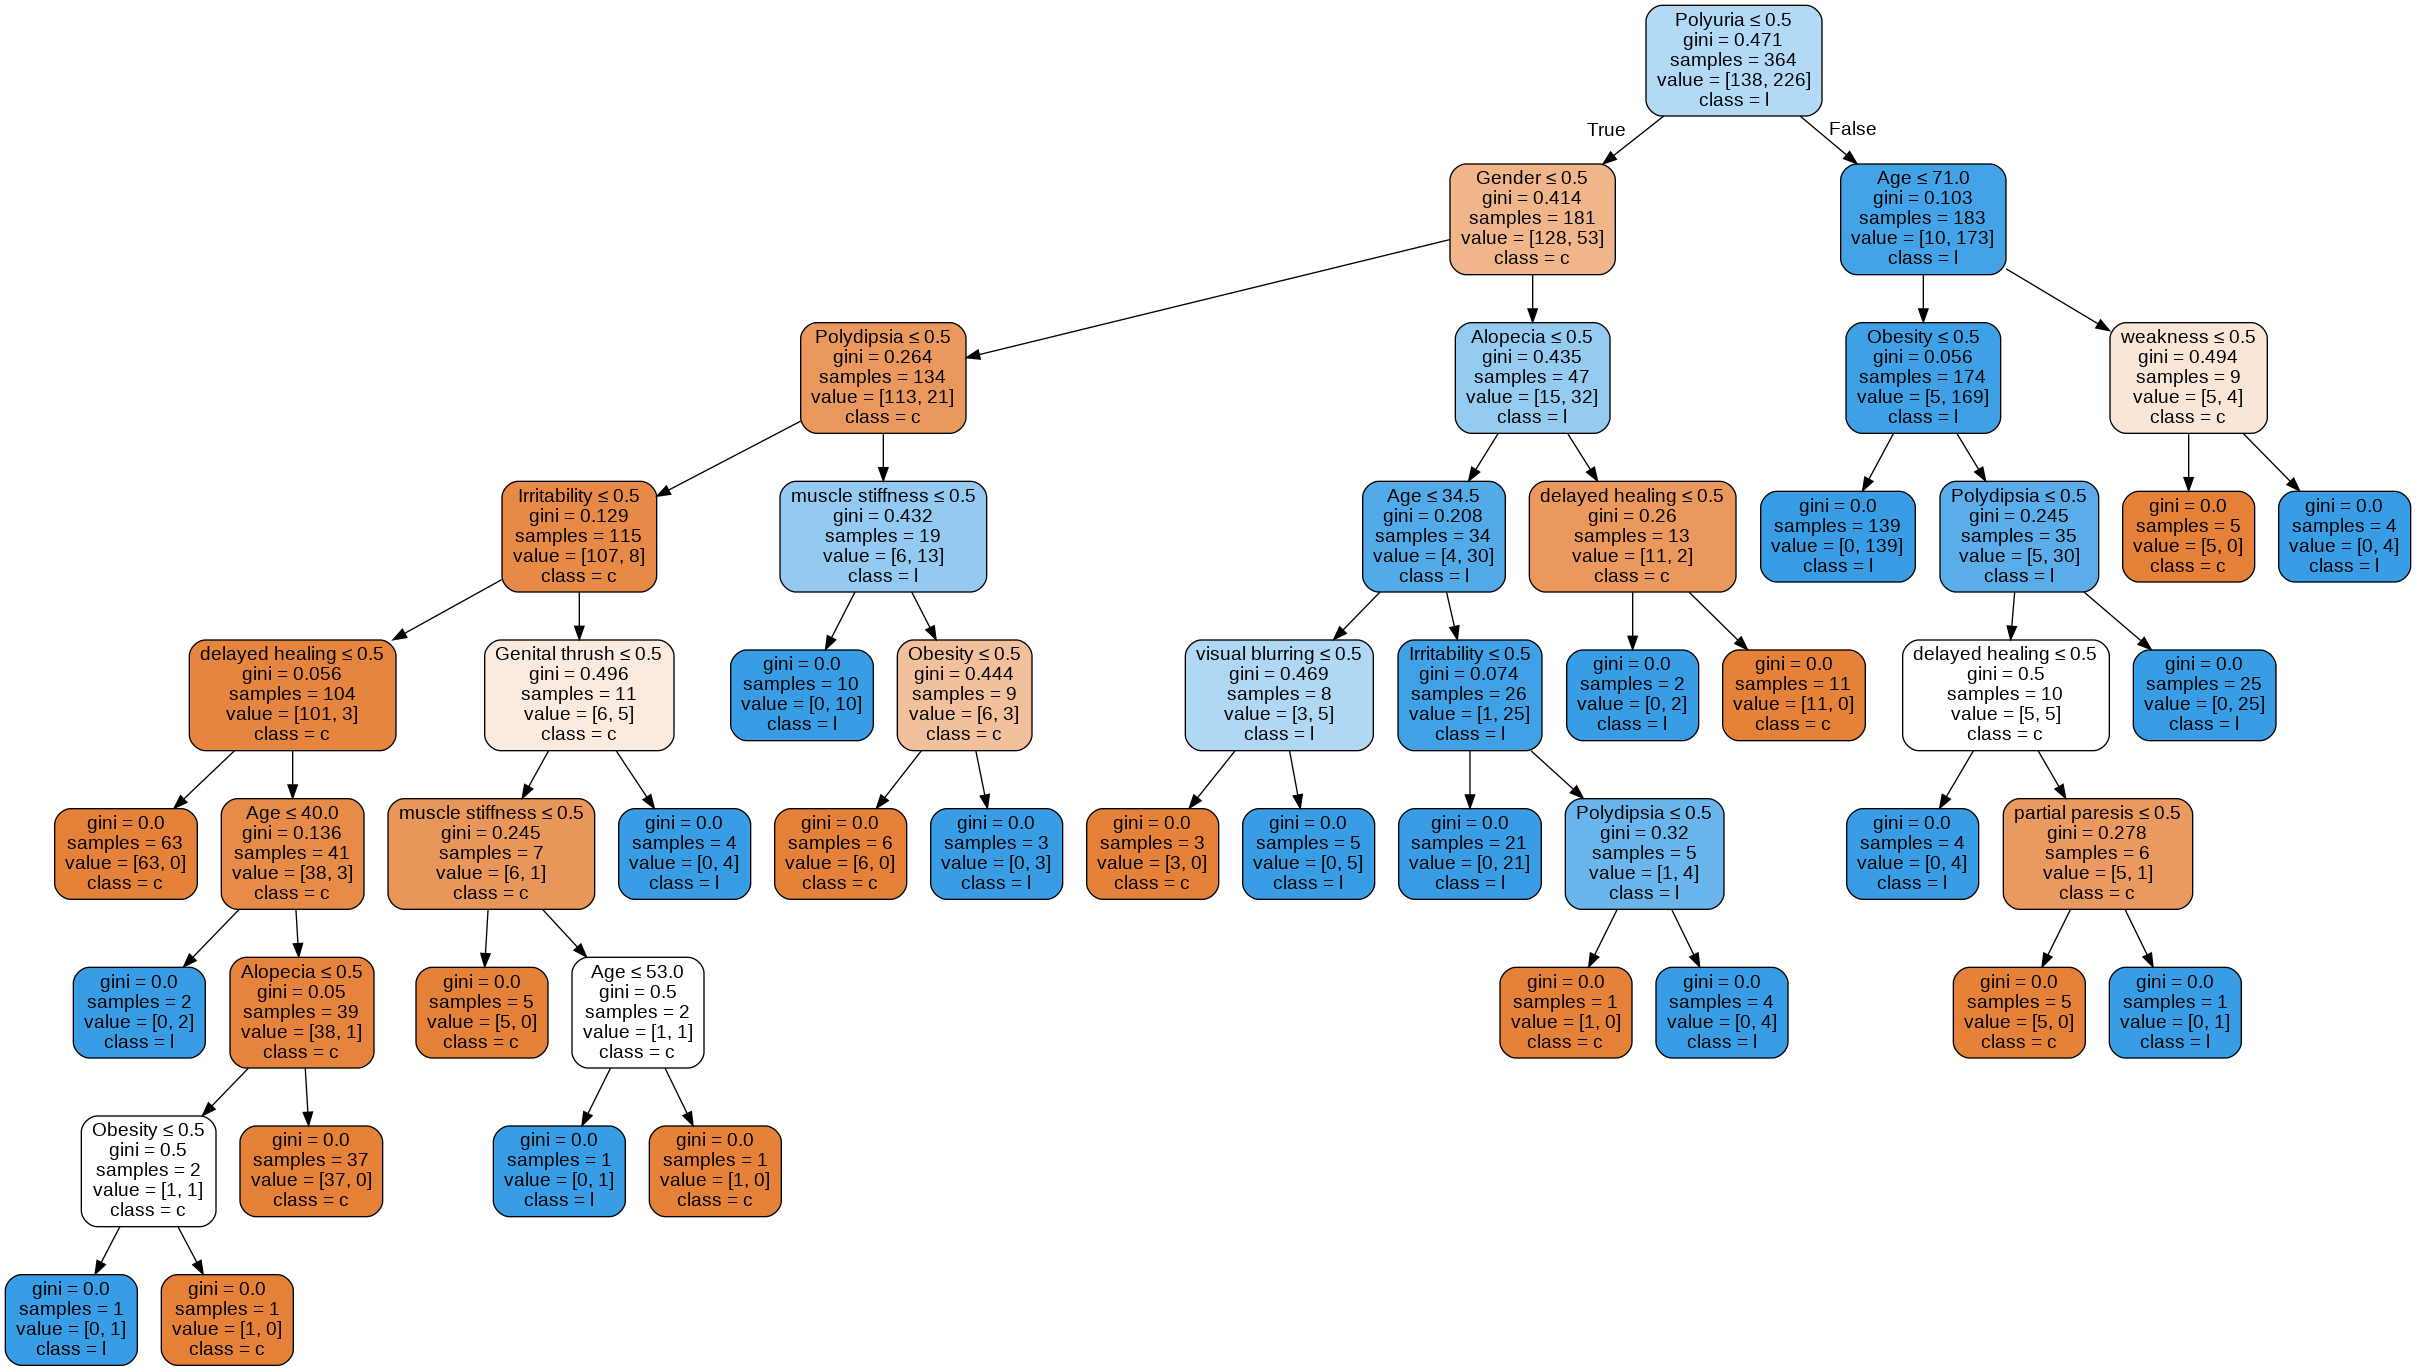

In [ ]:
#Visualization of normal dicision tree and saved to file
import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names='class',
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png('dt.png')

In [ ]:
#%%
# Visualization of all the trees generated in Random Forest and saved to file
RF = RandomForestClassifier(max_depth=9, n_estimators=5, random_state=0)
RF = RF.fit(x_train, y_train)

import os
# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

n = 1
for treeRF in RF.estimators_:
    dot_data = StringIO()
    export_graphviz(treeRF, out_file=dot_data, feature_names=features,  
                         class_names='class',
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    Image(graph.create_png())
    graph.write_png(("RFTree{}.png".format(str(n))))
    n+=1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Age frequency for positive and negative classes')

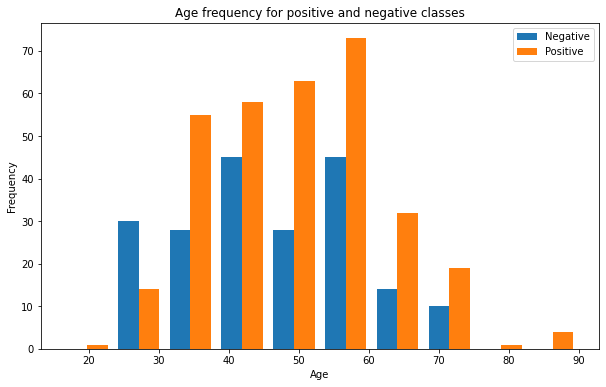

In [ ]:
plt.figure(figsize=(10,6))
plt.hist((data[data['class']==0]['Age'], data[data['class']==1]['Age']))
plt.legend(('Negative', 'Positive'))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age frequency for positive and negative classes")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Age frequency for positive and negative classes')

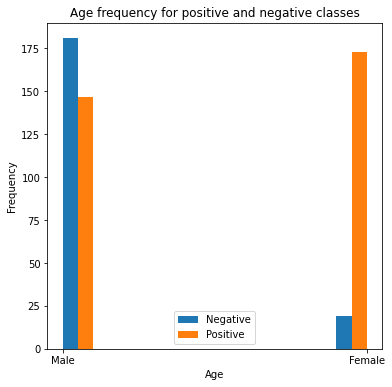

In [ ]:
plt.figure(figsize=(6,6))
plt.hist((data[data['class']==0]['Gender'], data[data['class']==1]['Gender']), rwidth=100)
plt.xticks(ticks=(0,1), labels=('Male', 'Female'))
plt.legend(('Negative', 'Positive'))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age frequency for positive and negative classes")

In [ ]:
data[data['class']==1][data['Gender']==1].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Age                   173
Gender                173
Polyuria              173
Polydipsia            173
sudden weight loss    173
weakness              173
Polyphagia            173
Genital thrush        173
visual blurring       173
Itching               173
Irritability          173
delayed healing       173
partial paresis       173
muscle stiffness      173
Alopecia              173
Obesity               173
class                 173
dtype: int64